In [2]:
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [2]:
# 一般的な5*5ガウシアンフィルタ
gaussian_filter = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], 
                           [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], 
                           [1, 4, 6, 4, 1]])

In [3]:
# バイラテラルフィルタ
def bilateral(image):
    image = np.array(image)

    length_vertical = len(image)
    length_horizontal = len(image[0])

    bar = tqdm(total=length_vertical+10)

    # ゼロパディングのための配列
    image_padding = np.zeros((length_vertical+4, length_horizontal+4))

    bar.update(5)

    # ゼロ行列に元の画像を埋め込む
    for i in range(length_vertical):
        for j in range(length_horizontal):
            image_padding[i+2][j+2] = image[i][j]

    image_bilateral = np.zeros((length_vertical, length_horizontal))

    bar.update(5)

    # フィルタにかける
    for i in range(length_vertical):
        for j in range(length_horizontal):
            input_array = image_padding[i:i+5, j:j+5]
            image_bilateral[i][j] = weight_process(input_array)
        bar.update(1)

    # ゼロパディング用の行と列を削除
    image_bilateral = np.delete(image_bilateral, [0, 1, length_vertical-2, length_vertical-1], 0)
    image_bilateral = np.delete(image_bilateral, [0, 1, length_horizontal-2, length_horizontal-1], 1)

    return image_bilateral

# 重み付けをする関数
# input_arrayは5*5行列であると仮定する
def weight_process(input_array, filter=gaussian_filter):
    center_value = input_array[2][2]
    bilateral_filter = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            weight = np.exp(- (center_value - input_array[i][j])**2 / 2)
            bilateral_filter[i][j] = filter[i][j] * weight

    # 要素が足して1となるように正規化する
    bilateral_filter = bilateral_filter / np.sum(np.sum(bilateral_filter))

    return int(np.sum(np.sum(bilateral_filter * input_array)))

In [2]:
# 画像を読み込む
img_1 = cv2.imread("./images/20200529_1.jpeg")
img_2 = cv2.imread("./images/20200529_2.jpeg")

In [5]:
# グレースケールにする
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [6]:
img_1_bilateral = bilateral(img_1)

100%|██████████| 2890/2890 [21:54<00:00,  2.24it/s]

In [8]:
img_1_bilateral

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 252., ..., 184.,   0.,   0.],
       ...,
       [  0.,   0., 206., ..., 156.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
img_1_bilateral = np.delete(img_1_bilateral, [0, 1, len(img_1_bilateral)-2, len(img_1_bilateral)-1], 0)
img_1_bilateral = np.delete(img_1_bilateral, [0, 1, len(img_1_bilateral[0])-2, len(img_1_bilateral[0])-1], 1)

In [31]:
img_1_bilateral

array([[252., 252., 252., ..., 180., 180., 184.],
       [252., 252., 252., ..., 185., 179., 179.],
       [252., 252., 252., ..., 185., 179., 179.],
       ...,
       [204., 205., 201., ..., 153., 155., 156.],
       [205., 219., 219., ..., 153., 155., 155.],
       [206., 205., 200., ..., 160., 160., 156.]])

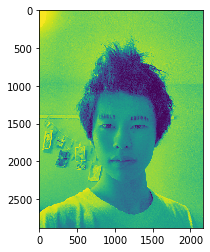

In [27]:
plt.imshow(img_1_bilateral)

In [28]:
cv2.imwrite("bilateral_1.png", img_1_bilateral)

True

In [29]:
img_10000 = cv2.imread("./images/20200529_1.jpeg")
img_10000 = cv2.cvtColor(img_10000, cv2.COLOR_BGR2GRAY)

In [30]:
cv2.imwrite("bi_gray.png", img_10000)

True

In [27]:
image = np.array(img_1)

length_vertical = len(image)
length_horizontal = len(image[0])

# ゼロパディングのための配列
image_padding = np.zeros([length_vertical+4, length_horizontal+4])

# ゼロ行列に元の画像を埋め込む
for i in range(length_vertical):
    for j in range(length_horizontal):
        image_padding[i+2][j+2] = image[i][j]

In [36]:
def a(x, n):
    return x[n:n+5, n:n+5]

In [60]:
def www(input_array, filter=gaussian_filter):
    center_value = input_array[2][2]
    bilateral_filter = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            weight = np.exp(- (center_value - input_array[i][j])**2 / 100)
            bilateral_filter[i][j] = filter[i][j] * weight

    # 要素が足して1となるように正規化する
    bilateral_filter = bilateral_filter / np.sum(np.sum(bilateral_filter))

    return int(np.sum(np.sum(bilateral_filter * input_array)))

In [61]:
start = time.time()
n = 100
b = a(img_1_bilateral, n)
c = www(b)
print(img_1_bilateral[n+2][n+2])
print(c)
end = time.time()
print((end - start)*2160*2880)

245.0
244
20590.631103515625


In [3]:
img_in = cv2.imread('2-1_in.jpeg')

In [4]:
bi_2 = cv2.bilateralFilter(img_in, 25, 1, 1)

In [5]:
bi_3 = cv2.bilateralFilter(img_in, 25, 20, 20)

In [6]:
cv2.imwrite("03200918_田村征之_2-1.jpeg", bi_2)
cv2.imwrite("03200918_田村征之_2-2.jpeg", bi_3)

True

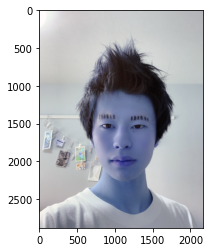

In [8]:
plt.imshow(bi)